In [12]:
# importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.basemap import Basemap

%matplotlib inline

In [13]:
# Importing troller csv files

ps_df = pd.read_csv(r"C:\Users\adars\Downloads\purse_seines.csv")
ps_df.head(10)

,mmsi,timestamp,distance_from_shore,distance_from_port,speed,course,lat,lon,is_fishing,source
0,9.924005e+12,1.379601e+09,0.0,1414.178833,0.0,298.500000,8.861500,-79.668427,-1.0,false_positives
1,9.924005e+12,1.379602e+09,0.0,1414.178833,0.0,298.500000,8.861506,-79.668442,-1.0,false_positives
2,9.924005e+12,1.379604e+09,0.0,1414.178833,0.1,128.399994,8.861511,-79.668488,-1.0,false_positives
3,9.924005e+12,1.379605e+09,0.0,1414.178833,0.1,111.199997,8.861511,-79.668480,-1.0,false_positives
4,9.924005e+12,1.379608e+09,0.0,1414.178833,0.0,41.700001,8.861502,-79.668503,-1.0,false_positives
5,9.924005e+12,1.379609e+09,0.0,1414.178833,0.0,82.699997,8.861495,-79.668480,-1.0,false_positives
6,9.924005e+12,1.379609e+09,0.0,1414.178833,0.1,70.300003,8.861500,-79.668510,-1.0,false_positives
7,9.924005e+12,1.379609e+09,0.0,1414.178833,0.1,108.199997,8.861495,-79.668503,-1.0,false_positives
8,9.924005e+12,1.379610e+09,0.0,1414.178833,0.1,93.300003,8.861506,-79.668503,-1.0,false_positives
9,9.924005e+12,1.379611e+09,0.0,1414.178833,0.1,44.299999,8.861480,-79.668495,-1.0,false_positives


In [14]:
# datatypes of each column 

ps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1545323 entries, 0 to 1545322
Data columns (total 10 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   mmsi                 1545323 non-null  float64
 1   timestamp            1545323 non-null  float64
 2   distance_from_shore  1545323 non-null  float64
 3   distance_from_port   1545323 non-null  float64
 4   speed                1545316 non-null  float64
 5   course               1545316 non-null  float64
 6   lat                  1545323 non-null  float64
 7   lon                  1545323 non-null  float64
 8   is_fishing           1545323 non-null  float64
 9   source               1545323 non-null  object 
dtypes: float64(9), object(1)
memory usage: 117.9+ MB


In [15]:
# Statistical data analysis


ps_df.describe()

,mmsi,timestamp,distance_from_shore,distance_from_port,speed,course,lat,lon,is_fishing
count,1.545323e+06,1.545323e+06,1.545323e+06,1.545323e+06,1.545316e+06,1.545316e+06,1.545323e+06,1.545323e+06,1.545323e+06
mean,8.788081e+13,1.431543e+09,2.301199e+05,3.420745e+05,5.119294e+00,1.905941e+02,1.390564e+01,1.472753e+01,-9.833250e-01
std,6.522389e+13,3.645865e+07,3.841463e+05,5.070968e+05,5.593512e+00,1.042562e+02,1.891573e+01,1.116258e+02,1.418592e-01
min,9.924005e+12,1.325378e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-6.922275e+01,-1.800000e+02,-1.000000e+00
25%,3.832297e+13,1.409017e+09,0.000000e+00,8.062060e+03,1.000000e-01,9.820000e+01,-4.091158e-01,-7.966909e+01,-1.000000e+00
50%,5.966517e+13,1.438458e+09,4.049592e+04,9.693059e+04,1.300000e+00,2.034000e+02,5.338995e+00,-1.897600e+00,-1.000000e+00
75%,1.583170e+14,1.462147e+09,2.866600e+05,4.934421e+05,1.120000e+01,2.791000e+02,3.510037e+01,1.410436e+02,-1.000000e+00
max,2.679667e+14,1.480032e+09,2.315626e+06,6.728604e+06,1.023000e+02,5.110000e+02,7.833025e+01,1.799934e+02,1.000000e+00


In [16]:
ps_df.shape

(1545323, 10)

In [17]:
#check for duplicate rows
duplicates = ps_df.duplicated()
ps_df[duplicates].head()


,mmsi,timestamp,distance_from_shore,distance_from_port,speed,course,lat,lon,is_fishing,source


In [18]:
#Droping duplicate rows
ps_df = ps_df.drop_duplicates()
ps_df.shape


(1545323, 10)

In [19]:
#Number of unique vessels under observation
ps_df['mmsi'].unique().shape


(28,)

In [20]:
#Number of data points for each vessel

ps_df['mmsi'].value_counts()


1.710880e+14    204261
3.832297e+13    170686
3.900562e+13    122160
1.088051e+13    117980
3.621263e+13    106659
4.393595e+13     86465
8.317103e+13     82008
1.928034e+14     78090
1.781833e+14     67746
1.332927e+14     65122
9.924005e+12     55933
1.291534e+14     43130
8.587357e+13     38350
7.911140e+13     35971
1.335548e+14     34385
1.098996e+14     31630
4.400912e+13     29802
2.661604e+13     29073
1.391359e+14     22920
2.679667e+14     21857
5.966517e+13     18694
1.819924e+13     17129
8.806097e+13     14799
1.117001e+13     14360
6.371639e+13     10543
3.899211e+13     10302
1.583170e+14      8708
1.785557e+14      6560
Name: mmsi, dtype: int64

C:\Users\adars\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='mmsi', ylabel='count'>

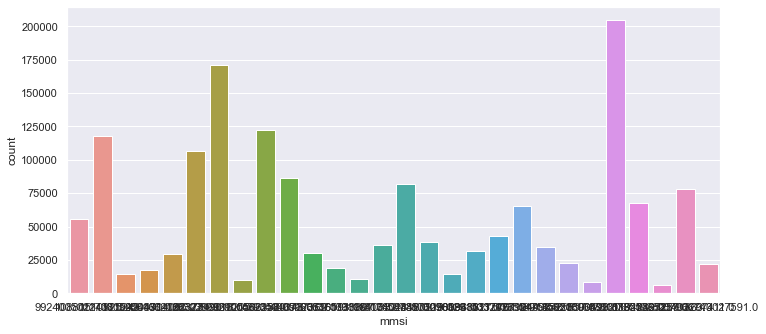

In [21]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.countplot(ps_df['mmsi'])


In [22]:
#Coverting Unix time to readable date time format
    
date_time = pd.to_datetime(ps_df['timestamp'],unit='s')
print(date_time)


0         2013-09-19 14:34:34
1         2013-09-19 14:53:15
2         2013-09-19 15:20:30
3         2013-09-19 15:39:36
4         2013-09-19 16:27:31
                  ...        
1545318   2016-11-24 23:18:39
1545319   2016-11-24 23:19:28
1545320   2016-11-24 23:19:39
1545321   2016-11-24 23:20:39
1545322   2016-11-24 23:21:09
Name: timestamp, Length: 1545323, dtype: datetime64[ns]


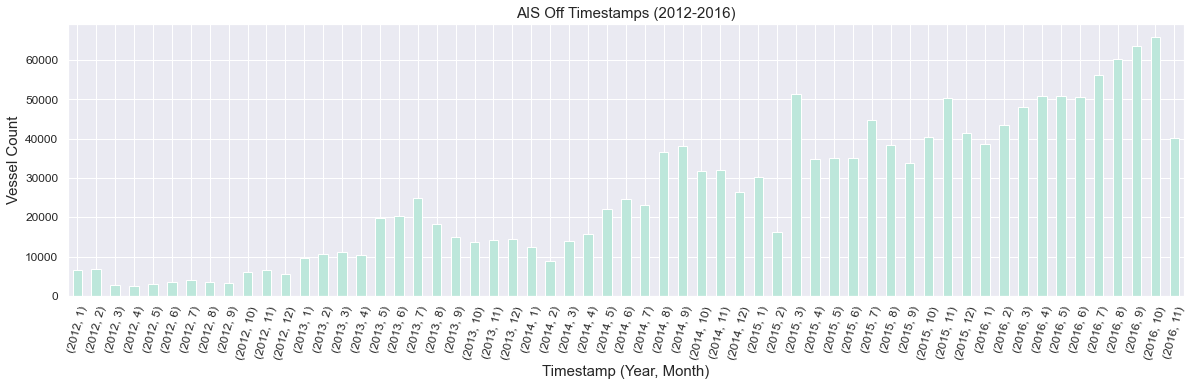

In [23]:
# Visualize the distribution of AIS off timestamps across 2-year period

plt.figure(figsize=(20,5))
# Group dataframe by month and year

timing = date_time.groupby([date_time.dt.year,
                                              date_time.dt.month])
ax = timing.count().plot(kind="bar", rot=75, cmap='icefire')
ax.set_xlabel("Timestamp (Year, Month)", fontsize=15)
ax.set_ylabel("Vessel Count", fontsize=15)
ax.set_title("AIS Off Timestamps (2012-2016)", fontsize=15)
ax.tick_params(labelsize=12);


In [24]:
# Time range of the dataset

pd.to_datetime(ps_df['timestamp'],unit='s').describe()

#Start date : 2012-01-03 21:06:29
#End date : 2016-11-24 23:58:30


C:\Users\adars\AppData\Local\Temp/ipykernel_8324/2161891621.py:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  pd.to_datetime(ps_df['timestamp'],unit='s').describe()


count                 1545323
unique                1515197
top       2013-07-10 00:48:55
freq                       22
first     2012-01-01 00:33:54
last      2016-11-24 23:59:28
Name: timestamp, dtype: object

In [25]:
#Remove Vessels at port

#Vessels at shore
at_shore = ps_df.loc[(ps_df['distance_from_shore'] == 0.00)]
print(f"{len(at_shore)} vessels (45% of observations) have timestamps at shore.")


420151 vessels (45% of observations) have timestamps at shore.


In [26]:
#Vessels at port
at_port = ps_df.loc[(ps_df['distance_from_port'] == 0.00)]
print(f"{len(at_port)} vessels have timestamps at port.")

print(at_port)
# drop observations where vessel is at port (i.e. distance is 0 m)


23443 vessels have timestamps at port.
                 mmsi     timestamp  distance_from_shore  distance_from_port  \
5307     9.924005e+12  1.395018e+09                  0.0                 0.0   
7549     9.924005e+12  1.405781e+09                  0.0                 0.0   
7550     9.924005e+12  1.405782e+09                  0.0                 0.0   
7551     9.924005e+12  1.405814e+09                  0.0                 0.0   
7552     9.924005e+12  1.405821e+09                  0.0                 0.0   
...               ...           ...                  ...                 ...   
1292604  3.832297e+13  1.364249e+09                  0.0                 0.0   
1334190  3.832297e+13  1.426197e+09                  0.0                 0.0   
1342191  3.832297e+13  1.429570e+09                  0.0                 0.0   
1410375  3.832297e+13  1.465969e+09                  0.0                 0.0   
1467188  4.393595e+13  1.379810e+09                  0.0                 0.0   



In [27]:
#Droping vessels at port
ps_df.drop(at_port['distance_from_port'] ,axis=0, inplace=True)


In [28]:
ps_df.loc[ps_df['is_fishing'] > 0, 'is_fishing'] = 1

In [29]:
ps_df['is_fishing'].value_counts()

-1.0    1522473
 0.0      19737
 1.0       3112
Name: is_fishing, dtype: int64

C:\Users\adars\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='is_fishing', ylabel='count'>

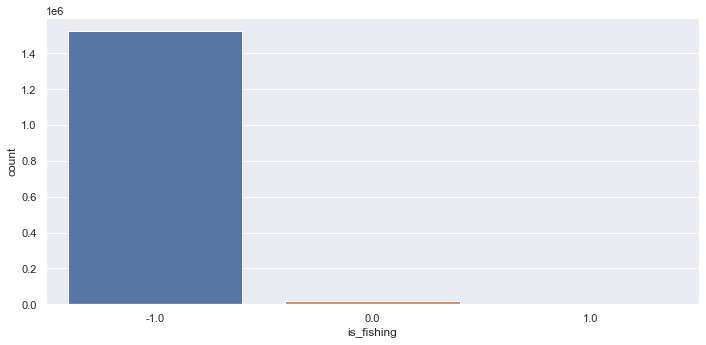

In [30]:
sns.countplot(ps_df['is_fishing'])

C:\Users\adars\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='mmsi', ylabel='count'>

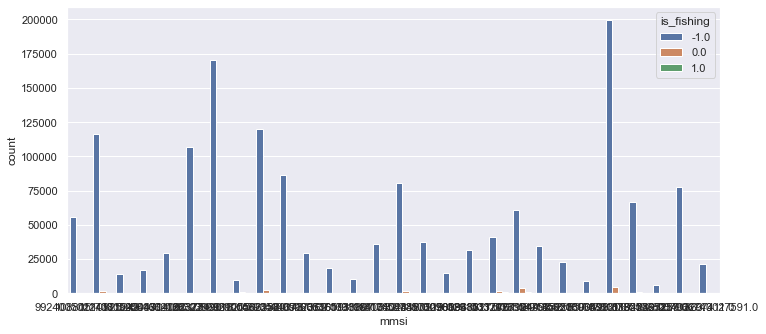

In [31]:
#Is_fishing

sns.countplot(ps_df['mmsi'], hue = ps_df['is_fishing'])


In [32]:
#dummy data

print(ps_df['mmsi'].unique())


[9.92400502e+12 2.66160409e+13 3.62126327e+13 5.96651651e+13
 1.33554755e+14 1.08805108e+13 3.90056226e+13 7.91114034e+13
 1.71088031e+14 1.78183327e+14 1.92803403e+14 1.11700055e+13
 1.81992449e+13 3.89921056e+13 4.40091237e+13 6.37163899e+13
 8.31710282e+13 8.58735733e+13 8.80609658e+13 1.09899633e+14
 1.29153375e+14 1.33292692e+14 1.39135923e+14 1.58316965e+14
 1.78555653e+14 2.67966743e+14 3.83229691e+13 4.39359467e+13]


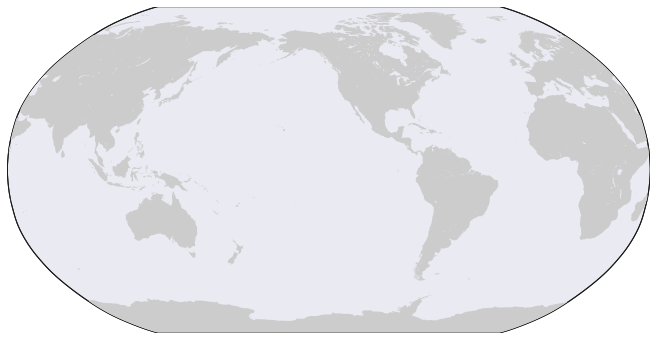

In [33]:
f = ps_df.loc[(ps_df['mmsi'] == 112940878780541.0)]
plt.figure(figsize=(12,6))
lons, lats = f['lon'].tolist(), f['lat'].tolist()
m = Basemap(projection='robin', resolution = 'l', area_thresh = 1000.0, lat_0=0, lon_0=-130)
m.bluemarble()
m.drawmapboundary()
m.fillcontinents()
x, y = m(lons, lats)
m.scatter(x, y, marker='.',color='red')


In [34]:
# n_rows = ps_df.shape[0]
# n_cols = ps_df.shape[1]

# #Subplot grid
# fig, axis = plt.subplots(n_rows, n_cols, figsize = (n_cols*3.2,n_rows*3.2) )

# for r in range(0,n_rows):
#   for c in range(0,n_cols):
#      i = r*n_cols + c #index to go through the column
#      ax = axis[r][c]  #where to position each subplot
#      sns.countplot(ps_df[cols[i]], hue = ps_df['is_fishing'], ax=ax)
#      ax.set_title(cols[i])
#      ax.legend(title='is_fishing', loc= 'upper right')

# plt.tight_layout()
